In [1]:
import fastf1 as ff1
import fastf1.plotting
import matplotlib.pyplot as plt

In [2]:
ff1.Cache.enable_cache('../cache')
ff1.plotting.setup_mpl()

In [3]:
year, event, event_type = 2023, 'Australia', 'Q'
session = ff1.get_session(year, event, event_type)
session.load()
#session.results.iloc[0:15].loc[:, ['Abbreviation', 'Q2']]

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\Ricky\AppData\Local\Programs

In [4]:
driver_1 = 'VER'
laps_driver_1 = session.laps.pick_driver(driver_1)
#idk_mate = laps_driver_1.loc[laps_driver_1['LapNumber'] == 6]
idk_mate = laps_driver_1.pick_fastest()
telemetry = idk_mate.get_telemetry().add_distance()
team_driver_1 = laps_driver_1['Team']
# for speed in telemetry['Speed']:
#     print(speed)

C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\Ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] 

In [10]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName}"
plot_ratios = [2, 2, 2, 2]
plot_filename = plot_title.replace(" ", "") + ".png"

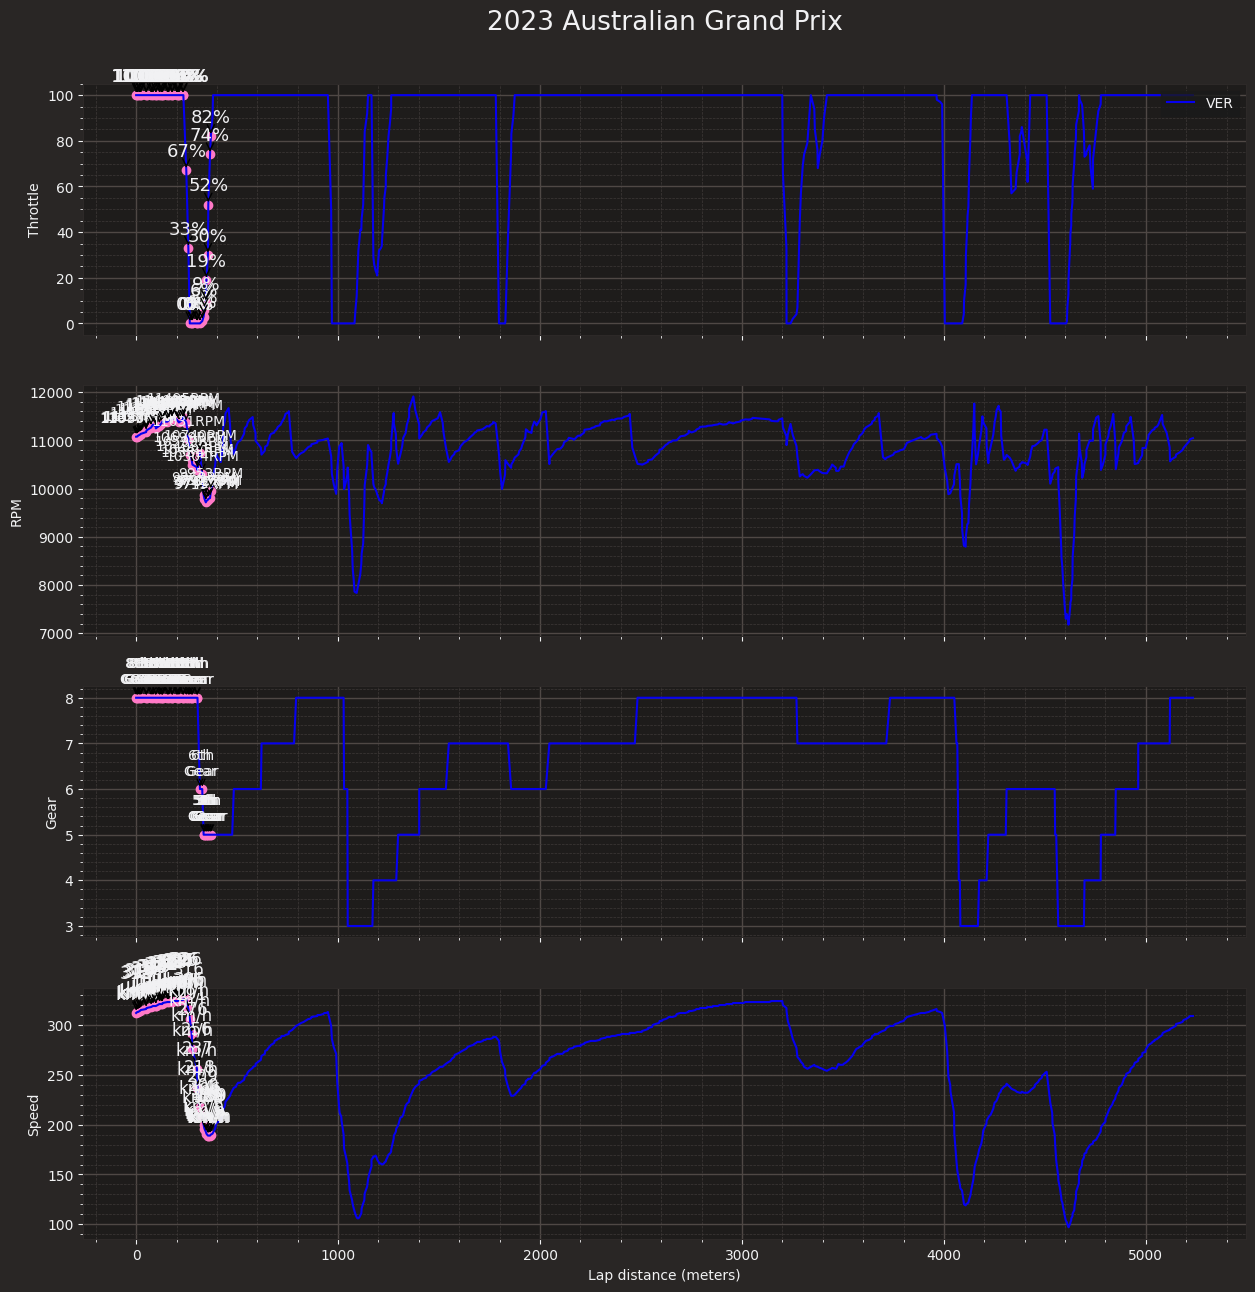

In [11]:
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(4, gridspec_kw={'height_ratios': plot_ratios})

# x_min = 1350
# x_max = x_min+1000

# Set the plot title
ax[0].set_title(plot_title, y=1.15)

ax[3].plot(telemetry['Distance'], telemetry['Speed'], label=driver_1, color=ff1.plotting.team_color('RBR'))
ax[3].set(ylabel='Speed')

# Find ever nTH entry in panda DataFrame
every_nTH_entry = telemetry.iloc[:41]

# Plot every nTH entry as scatter points on top of the line plot
ax[3].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['Speed'].to_numpy(), marker='o')

# Annotate every nTH entry
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['Speed']
    text = f'{y_coord}\nkm/h'
    ax[3].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, arrowprops=dict(facecolor='white', arrowstyle='->'))

ax[0].plot(telemetry['Distance'], telemetry['Throttle'], label=driver_1, color=ff1.plotting.team_color('RBR'))
ax[0].set(ylabel='Throttle')
ax[0].legend(loc="upper right")
ax[0].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['Throttle'].to_numpy(), marker='o')
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['Throttle']
    text = f'{y_coord}%'
    ax[0].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0,10), ha='center', fontsize=13, arrowprops=dict(facecolor='white', arrowstyle='->'))

ax[2].plot(telemetry['Distance'], telemetry['nGear'], label=driver_1, color=ff1.plotting.team_color('RBR'))
ax[2].set(ylabel='Gear')
ax[2].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['nGear'].to_numpy(), marker='o')
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['nGear']
    text = f'{y_coord}th\nGear'
    ax[2].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, arrowprops=dict(facecolor='white', arrowstyle='->'))


ax[1].plot(telemetry['Distance'], telemetry['RPM'], label=driver_1, color=ff1.plotting.team_color('RBR'))
ax[1].set(ylabel='RPM')
ax[1].scatter(every_nTH_entry['Distance'].to_numpy(), every_nTH_entry['RPM'].to_numpy(), marker='o')
for index, row in every_nTH_entry.iterrows():
    x_coord = row['Distance']
    y_coord = row['RPM']
    text = f'{y_coord}RPM'
    ax[1].annotate(text, (x_coord, y_coord), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, arrowprops=dict(facecolor='white', arrowstyle='->'))


ax[3].set(xlabel='Lap distance (meters)')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
# for i in range(4):
#     ax[i].set_xlim(left=x_min, right=x_max)
plt.savefig(plot_filename, dpi=300)
plt.show()